# მოდელი

In [142]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# მონაცემების დამუშავება და ანალიზი

In [64]:
df = pd.read_csv('payment_fraud.csv')
df

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0
39219,237,1,4.921318,creditcard,236.082639,shopping,1.0,0


In [9]:
# მახასიათებლების და ცვლადების რაოდენობა
print(df.shape)
df.columns.tolist()

(39221, 8)


['accountAgeDays',
 'numItems',
 'localTime',
 'paymentMethod',
 'paymentMethodAgeDays',
 'Category',
 'isWeekend',
 'label']

In [17]:
# რიცხვითი ცვლადების რაოდენობა და # კატეგორიული ცვლადების რაოდენობა
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
len(numeric_cols),len(categorical_cols)

(6, 2)

In [94]:
# დუპლიკატების რაოდენობა და მათი წაშლა
df.duplicated().sum()
df = df.drop_duplicates() 
df


,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0.0,0,True,False,False,True
1,725,1,4.742303,0.000000,0.0,0,False,True,False,False
2,845,1,4.921318,0.000000,1.0,0,False,False,True,False
3,503,1,4.886641,0.000000,1.0,0,False,False,False,False
4,2000,1,5.040929,0.000000,0.0,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,0.000000,0.0,0,False,False,False,True
39217,1647,1,4.876771,377.930556,0.0,0,False,False,False,True
39218,1591,1,4.742303,0.000000,1.0,0,False,False,False,True
39219,237,1,4.921318,236.082639,1.0,0,False,False,False,True


In [43]:
# target ცვლადების შემოწმება და ამ შემთხვევაში გვაქვს დისბალანსია
proportion = df['label'].value_counts(normalize=True)
for label, value in proportion.items():
    print(f"{label}: {value * 100:.2f}%")


0: 98.91%
1: 1.09%


In [135]:
# გამოტოვებული მნიშვნელობების დამუშავება

# გამოტოვებული მნიშვნელობების შევსება
# რიცხვითი სვეტები -> მედიანით
imputer = SimpleImputer(strategy="mean")  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# კატეგორიული სვეტები ყველაზე ხშირი მნიშვნელობით (mode)
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

# შემოწმება — დარჩა თუ არა გამოტოვებული მნიშვნელობები
print("\nსულ გამოტოვებული მნიშვნელობები:", df.isnull().sum().sum())


სულ გამოტოვებული მნიშვნელობები: 392


# ენკოდირება One-hot

In [97]:
categorical_columns = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df, columns=categorical_columns, dtype=int)

bool_columns = df.select_dtypes(include='bool').columns
df.loc[:, bool_columns] = df.loc[:, bool_columns].astype(int)
df_encoded.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_paypal,paymentMethod_storecredit,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0.0,0,1,0,0,1
1,725,1,4.742303,0.000000,0.0,0,0,1,0,0
2,845,1,4.921318,0.000000,1.0,0,0,0,1,0
3,503,1,4.886641,0.000000,1.0,0,0,0,0,0
4,2000,1,5.040929,0.000000,0.0,0,0,0,0,1


In [126]:
# მონაცემების გაყოფა საწვრთნო/სატესტო მონაცემებად 80/20
X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


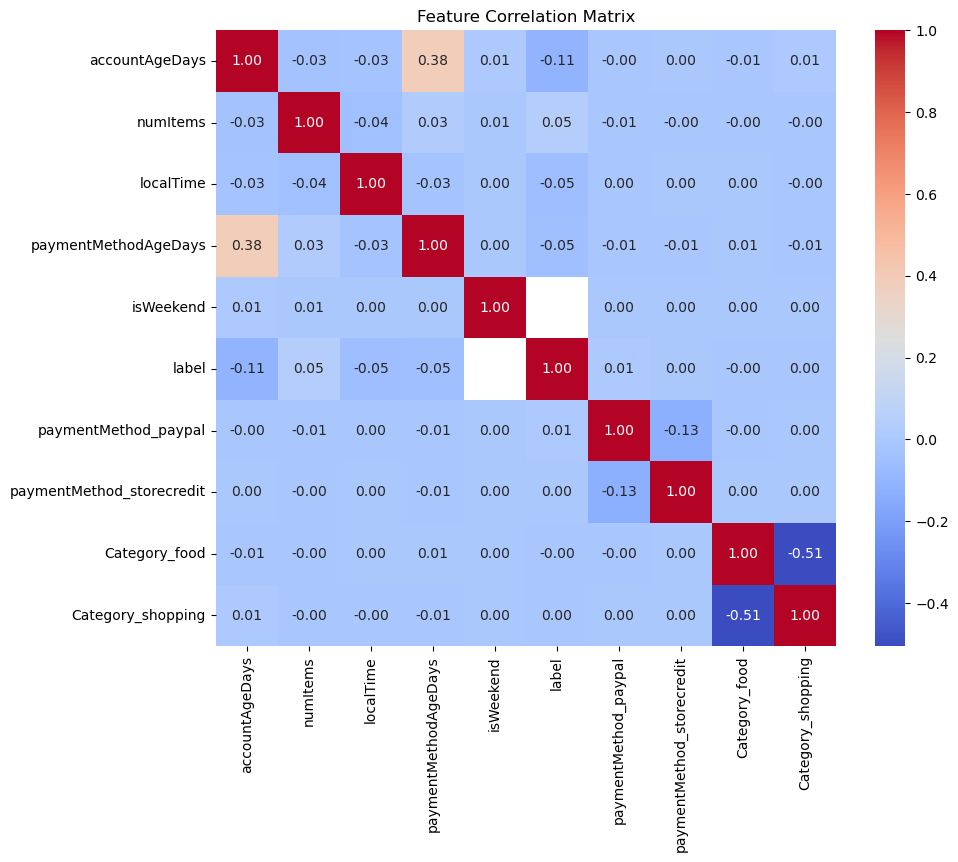

In [102]:
# კორელაცია და მათი ურთიერთობა ტარგეტებთან

# მახასიათებლებს შორის კორელაცია
correlation_matrix = df.corr()

# თითო მახასიათებლის კორელაცია ტარგეტთან
target_corr = df.corr()['label'].sort_values(ascending=False)


# კორელაციის მატრიცის თერმოგრამა
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# მოდელების შექმნა

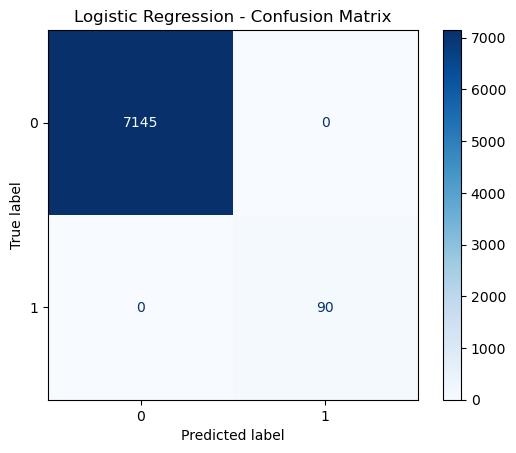

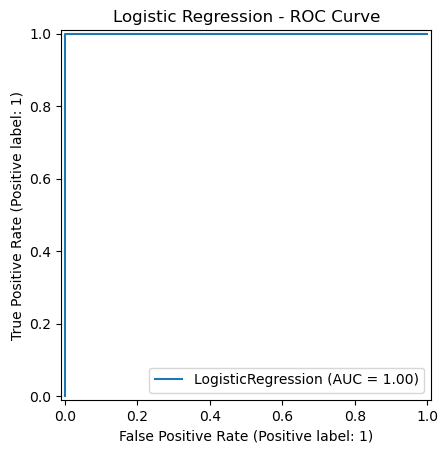

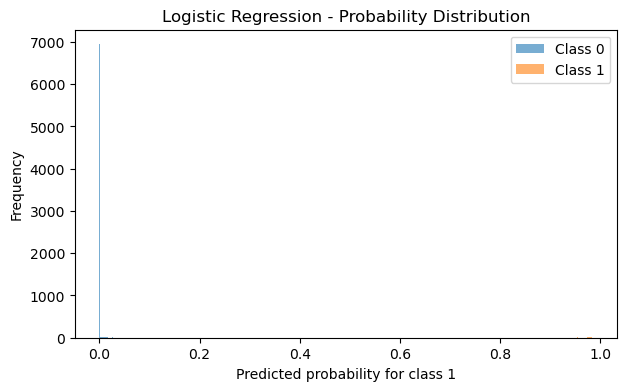

In [136]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.show()

# ალბათობის განაწილება
plt.figure(figsize=(7,4))
plt.hist(y_prob_logreg[y_test==0], bins=30, alpha=0.6, label='Class 0')
plt.hist(y_prob_logreg[y_test==1], bins=30, alpha=0.6, label='Class 1')
plt.title("Logistic Regression - Probability Distribution")
plt.xlabel("Predicted probability for class 1")
plt.ylabel("Frequency")
plt.legend()
plt.show()

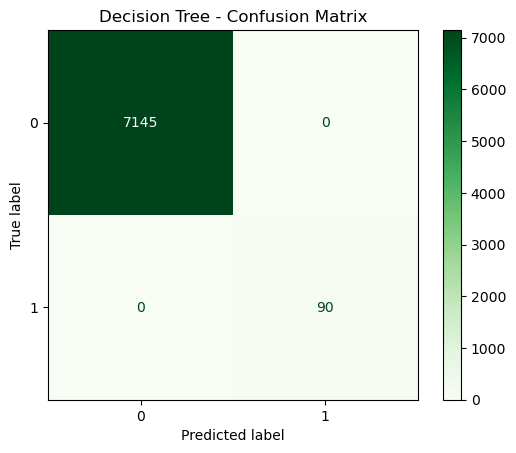

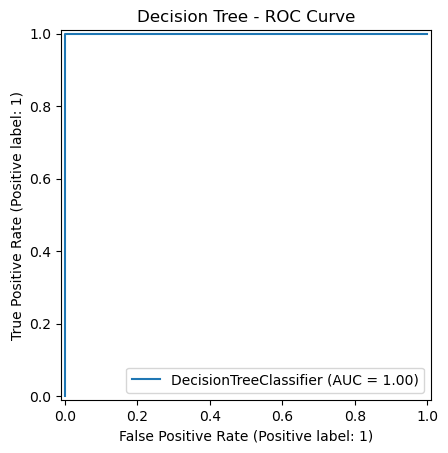

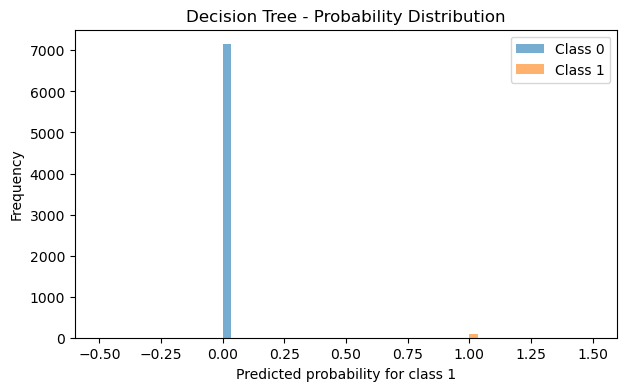

In [129]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.title("Decision Tree - ROC Curve")
plt.show()

# ალბათობის განაწილება
plt.figure(figsize=(7,4))
plt.hist(y_prob_dt[y_test==0], bins=30, alpha=0.6, label='Class 0')
plt.hist(y_prob_dt[y_test==1], bins=30, alpha=0.6, label='Class 1')
plt.title("Decision Tree - Probability Distribution")
plt.xlabel("Predicted probability for class 1")
plt.ylabel("Frequency")
plt.legend()
plt.show()

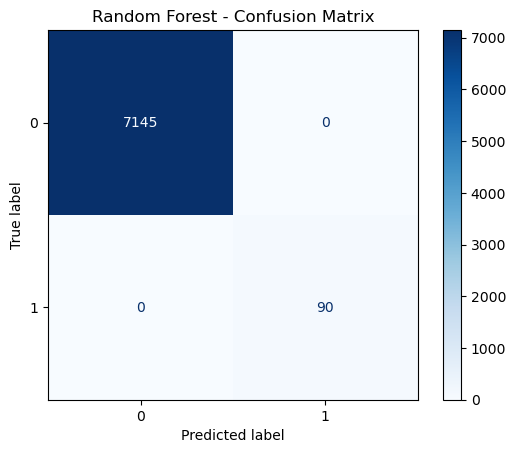

In [137]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest - Confusion Matrix")
plt.show()

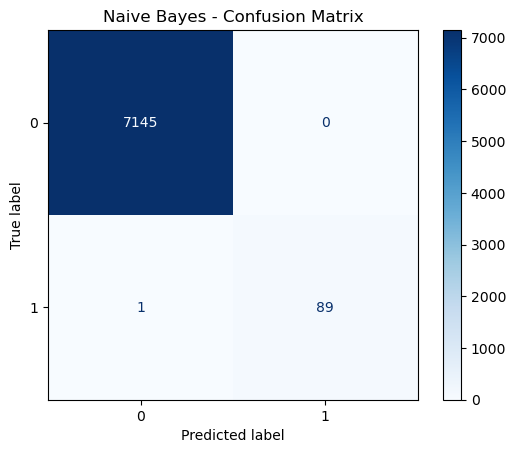

In [139]:
#  Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

# მეტრიკების გამოთვლა

In [143]:
# მოდელების სიაში
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}

# ცხრილის შესაქმნელი სიები
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-score": f1_score(y_test, y_pred, average='weighted')
    })

# ცხრილის წარმოჩენა
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  1.000000   1.000000  1.000000  1.000000
1        Decision Tree  1.000000   1.000000  1.000000  1.000000
2        Random Forest  1.000000   1.000000  1.000000  1.000000
3          Naive Bayes  0.999862   0.999862  0.999862  0.999861
